In [18]:
import spacy
from medspacy.context import ConTextComponent
from medspacy.visualization import visualize_ent
from scispacy.linking import EntityLinker
nlp = spacy.load("en_core_sci_sm")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})
nlp.add_pipe("medspacy_context")

doc = nlp("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")
visualize_ent(doc)

Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/requests/models.py:176: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if isinstance(hook, collections.Callable):
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to un

In [21]:
# Let's look at a random entity!
entity = doc.ents[0]

print("Name: ", entity)

# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
linker = nlp.get_pipe("scispacy_linker")
for umls_ent in entity._.kb_ents:
	# print(linker.kb.cui_to_entity[umls_ent[0]])
	print(umls_ent[0])

Name:  Alterations
C1515926
C0013378
C0026882
C0085633
C2939186


In [ ]:

text = """
No findings of Dipalmitoyl Phosphatidylcholine in pulmonary specimen.
"""
text = open("example_article1.txt").read()
# text = "Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals."
doc = nlp(text)
visualize_ent(doc)

In [5]:
doc.ents[0]._.is_negated

False

In [3]:
# Run this when it's first time to build the pym.splite3
from owlready2 import *
from owlready2.pymedtermino2 import *
from owlready2.pymedtermino2.umls import *

default_world.set_backend(filename = "/data/joe/pym.sqlite3")
import_umls("/data/joe/umls-2022AA-full.zip", terminologies = ["SNOMEDCT_US", "CUI"])
default_world.save()

ValueError: Cannot save existent quadstore in '/data/joe/pym.sqlite3': File already exists! Use a new filename for saving quadstore or, for opening an already existent quadstore, do not create any triple before calling set_backend() (including creating an empty ontology or loading a module that does so).

In [2]:
# Run this when reload the pysqlite3
from owlready2.pymedtermino2 import umls
umls.default_world.set_backend(filename = "/data/joe/pym.sqlite3")

In [3]:
from owlready2 import *
PYM = get_ontology("http://PYM/").load()
SNOMEDCT_US = PYM["SNOMEDCT_US"]
CUI = PYM["CUI"]

In [75]:
umls_concepts = owlready2.pymedtermino2.model.Concepts()

# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
linker = nlp.get_pipe("scispacy_linker")
for entity in doc.ents:
    for umls_ent in entity._.kb_ents:
        # print(linker.kb.cui_to_entity[umls_ent[0]])
        # print(umls_ent[0])
        umls_concepts.add(CUI[umls_ent[0]])
        break
snomed_concepts = umls_concepts >> SNOMEDCT_US

Name:  Abstract



In [79]:
import seaborn as sns

def sort_two_lists(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists, key=lambda pair: pair[1])

    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2

{'365860008': 1, '384821006': 2, '106028002': 2, '302292003': 8, '118222006': 9, '118228005': 1, '118254002': 3, '248982007': 1, '116336009': 1, '364830008': 3, '298325004': 1, '441742003': 5, '64572001': 1}
['General clinical state finding', 'Functional finding', 'Pregnancy, childbirth and puerperium finding', 'Eating / feeding / drinking finding', 'Finding of movement', 'Disease', 'Mental state, behavior and/or psychosocial function finding', 'Musculoskeletal finding', 'Finding of head and neck region', 'Position of body and posture - finding', 'Evaluation finding', 'Finding of trunk structure', 'General finding of observation of patient'] [1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 5, 8, 9]


<AxesSubplot:>

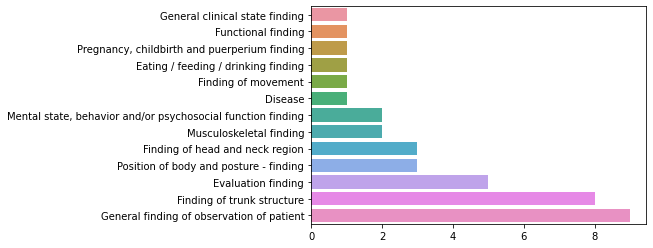

In [80]:
# level_0 = SNOMEDCT_US["138875005"].children # root
level_1 = SNOMEDCT_US["404684003"].children # clinical findings
count_dic = {}
for s_c in list(snomed_concepts):
    while s_c.parents:
        s_c = s_c.parents[0]
        if s_c in level_1:
            count_dic[s_c.name] = count_dic.get(s_c.name, 0) + 1
            break
print(count_dic)
s_names, counts = sort_two_lists(list(count_dic.keys()), list(count_dic.values()))
s_labels = [str(SNOMEDCT_US[s_name].label[0]) for s_name in s_names]
print(s_labels, counts)
sns.barplot(y=s_labels, x=counts)


In [70]:
SNOMEDCT_US["138875005"].children

[SNOMEDCT_US["105590001"] # Substance,
 SNOMEDCT_US["123037004"] # Body structure,
 SNOMEDCT_US["123038009"] # Specimen,
 SNOMEDCT_US["243796009"] # Situation with explicit context,
 SNOMEDCT_US["254291000"] # Staging and scales,
 SNOMEDCT_US["260787004"] # Physical object,
 SNOMEDCT_US["272379006"] # Event,
 SNOMEDCT_US["308916002"] # Environment or geographical location,
 SNOMEDCT_US["362981000"] # Qualifier value,
 SNOMEDCT_US["363787002"] # Observable entity,
 SNOMEDCT_US["370115009"] # Special concept,
 SNOMEDCT_US["373873005"] # Pharmaceutical / biologic product,
 SNOMEDCT_US["404684003"] # Clinical finding,
 SNOMEDCT_US["410607006"] # Organism,
 SNOMEDCT_US["419891008"] # Record artifact,
 SNOMEDCT_US["48176007"] # Social context,
 SNOMEDCT_US["71388002"] # Procedure,
 SNOMEDCT_US["78621006"] # Physical force,
 SNOMEDCT_US["900000000000441003"] # SNOMED CT Model Component]